In [0]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
states = env.observation_space.n
actions = env.action_space.n
Q = np.zeros((states, actions))
episodes = 15000 # how many times to run the enviornment from the beginning
max_steps = 100  # max number of steps allowed for each run of enviornment
learning_rate = 0.81  # learning rate
gamma = 0.96
render = False # if you want to see training set to true
epsilon = 0.9

In [6]:
rewards = []
for episode in range(episodes):
  state = env.reset()
  for _ in range(max_steps):
    if render:
      env.render()
    if np.random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])
    next_state, reward, done, _ = env.step(action)
    Q[state, action] = Q[state, action] + learning_rate * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action] )
    state = next_state
    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break

print(Q)
print(f"Average Rewards: {sum(rewards)/len(rewards)} ")

[[8.88773252e-02 9.65574917e-03 7.37574525e-03 9.79175785e-03]
 [6.28369801e-03 7.53221524e-03 4.24700040e-03 2.19466075e-01]
 [2.44802943e-03 3.43127162e-03 6.63362282e-03 3.79711686e-01]
 [3.06215289e-03 2.63997134e-03 2.31976931e-03 1.64294066e-01]
 [2.06230873e-01 4.08977612e-03 1.89064027e-03 2.03191572e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.35800188e-06 6.29099524e-06 3.74271131e-01 1.47985764e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.43836840e-03 5.57242879e-03 6.18771448e-05 4.35819019e-01]
 [2.66654798e-03 7.16897955e-01 1.91254353e-03 3.18697882e-03]
 [2.76040881e-01 1.20522366e-04 3.76097924e-04 5.95653898e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.66435870e-04 1.74927887e-02 9.02781784e-01 2.96592404e-02]
 [1.15586737e-01 9.98595891e-01 7.01305009e-02 1.23484928e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

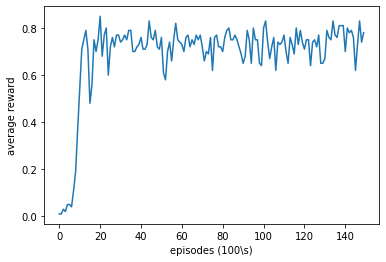

In [7]:
import matplotlib.pyplot as plt
def get_average(values):
  return sum(values)/len(values)
avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))
plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\s)')
plt.show()